# Getting Data
We start from scratch and use pandas or more elaborated ways below.

## stdin and stdout

In [62]:
%cat 'F_Scott_Fitzgerald_The_Great_Gatsby.txt' | python count_words.py 'Gatsby'

2406	the
1509	and
1405	a
1140	of
1139	to
993	i
793	in
767	he
749	was
530	that
0 times Gatsby in 0 lines


In [86]:
file_name = 'F_Scott_Fitzgerald_The_Great_Gatsby.txt'

import re

starts_with= 0

with open(file_name, 'r') as f:
    for line in f:
        if re.match("I",line.strip()):
            starts_with_has += 1
print starts_with

0


## Delimited Files
Files with no headers and want each row as a **list**

In [ ]:
import csv

Tab-delimited file

In [19]:
with open('data/Investing.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        print row
        date = row[0]
        stock  = row[1]
        price  = float(row[2])
        #process(date, stock, price)

['01/04/2016', 'APPL', '98000']
['01/07/2016', 'MSFT', '100000']
['01/08/2016', 'FB', '100000']
['01/11/2016', 'AAPL', '101500']
['01/12/201', '6FB', '101500']
['01/13/2016', 'MSFT', '101500']


If your file has headers

(you can skip the header row with **reader.next()**)

In [21]:
with open('data/Investing_2.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter= ':')
    for row in reader:
        date = row['date']
        sybol= row['symbol']
        price= row['price']
        print date


01/04/2016
01/07/2016
01/08/2016
01/11/2016
01/12/201
01/13/2016


#### Write out delimited data  

In [29]:
today_price = {'APPL': 90.91, 'MFST': 41.67, 'FB': 64.5}

with open('data/Invest_delimited.txt', 'wb') as f:
    writer = csv.writer(f, delimiter='\t')
    for stock, price in today_price.items():
        writer.writerow([stock, price])

## Reading and Writing data in Text Format


        read_csv        Load delimited data from a file. Use comma as default delimiter
        read_table      Load delimited data from a file. Use tab('\t') as default delimiter
        read_fwf        Read data in fixed-width column format (no delimiters)
        read_clipboard  Version of read_table that reads data from clipboard. 
        

In [101]:
import pandas as pd
from pandas import Series

In [8]:
file_name = 'data/ex1.csv'

df  = pd.read_csv(file_name)
# or we could have used pd.read_table('data/ex1.csv', sep=',')

print df

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


#### Files with no header

In [6]:
pd.read_csv(file_name, header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [18]:
names = ['1st', '2nd', '3th', '4th', 'txt']
pd.read_csv(file_name, names = names)

,1st,2nd,3th,4th,txt
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [22]:
#changing the index
pd.read_csv(file_name, names= names, index_col ='txt')

,1st,2nd,3th,4th
txt,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [25]:
#hierarchical index from multiple columns
parsed = pd.read_csv('data/csv_mindex.csv', index_col=['key1', 'key2'])
print parsed

           value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16


In [34]:
#Where there's not a fixed delimiter

list(open('data/ex3.txt'))

['       A     B     C\n',
 'a      1     2     3\n',
 'b     4    5       6\n',
 'c    7     8       0  \n',
 'd   10    1        22\n',
 '\n']

In [38]:
result = pd.read_table('data/ex3.txt', sep='\s+')
#or pd.read_table('data/ex3.txt', sep='\s+', skiprows=[0])

print result

    A  B   C
a   1  2   3
b   4  5   6
c   7  8   0
d  10  1  22


### Handling missing values

In [40]:
result = pd.read_csv('data/ex5.csv')
print result

  something  a   b     c   d  messg
0       one  1   2   3.0   4    NaN
1       two  5   6   NaN   8  world
2     three  9  10  11.0  12    foo


In [41]:
pd.isnull(result)

,something,a,b,c,d,messg
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [43]:
#Different NA sentinels can be specified for each column in a dict

sentinels = {'messg': ['foo', 'NA'], 'something':['two']}
pd.read_csv('data/ex5.csv', na_values= sentinels)

,something,a,b,c,d,messg
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### Example

In [90]:
PLK = pd.read_table('data/CMB_spectrum.txt', sep='\s+', skiprows=[1,2], nrows=30)
#print PLK

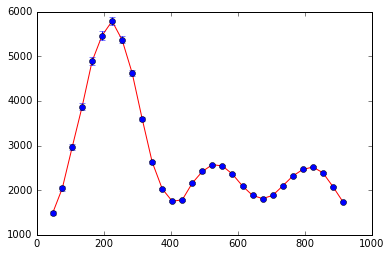

In [91]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(PLK['ELL'], PLK['D_ELL'], 'r-')
plt.errorbar(PLK['ELL'], PLK['D_ELL'], yerr=PLK['ERR'], fmt='o')
plt.show()

#### Reading files in pieces

In [112]:
chunker = pd.read_table('data/CMB_spectrum.txt', sep='\s+', skiprows=[1,2], chunksize=50)
print chunker

In [116]:
#make sure it gets read --- read_csv

tot = Series([])
for piece in chunker:
    tot = tot.add(piece['ELL'].value_counts(), fill_value=0)

tot = tot.sort_values()
print tot

Series([], dtype: float64)
